In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata as rd
from scipy.stats.mstats import rankdata as rd2
import glob
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_spli
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import sklearn

In [2]:
X = pd.read_csv("/Users/kiavang/Desktop/MNDailyCasesMarch.csv", index_col=0)
Y = pd.read_csv("/Users/kiavang/Desktop/MNTotalCasesMarch.csv", index_col=0)
Z = pd.read_csv("/Users/kiavang/Desktop/MNMortalityMarch.csv", index_col=0)

In [3]:
X

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
County Name,,,,,,,,,,,,,,,,,,,,,
Anoka County,0,0,0,0,0,0,0,0,0,1,...,26,18,10,16,24,26,31,27,16,9
Carver County,0,0,0,0,0,0,0,0,0,0,...,1,1,5,2,7,2,6,1,3,2
Dakota County,0,0,0,0,0,0,0,0,0,0,...,31,17,28,18,29,42,31,37,26,15
Hennepin County,0,0,0,0,0,0,0,0,0,0,...,122,90,42,92,97,95,98,125,90,68
Ramsey County,0,0,0,0,0,1,0,0,0,0,...,54,56,41,46,49,52,64,62,46,42
Scott County,0,0,0,0,0,0,0,0,0,0,...,2,8,5,5,5,4,6,9,17,8
Washington County,0,0,0,0,0,0,0,0,0,0,...,9,3,3,24,7,10,25,17,13,7


In [4]:
Y

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
County Name,,,,,,,,,,,,,,,,,,,,,
Anoka County,0,0,0,0,0,0,0,0,0,1,...,1742,1760,1770,1786,1810,1836,1867,1894,1910,1919
Carver County,0,0,0,0,0,0,0,0,0,0,...,270,271,276,278,285,287,293,294,297,299
Dakota County,0,0,0,0,0,0,0,0,0,0,...,1713,1730,1758,1776,1805,1847,1878,1915,1941,1956
Hennepin County,0,0,0,0,0,0,0,0,0,0,...,10191,10281,10323,10415,10512,10607,10705,10830,10920,10988
Ramsey County,0,0,0,0,0,1,1,1,1,1,...,3936,3992,4033,4079,4128,4180,4244,4306,4352,4394
Scott County,0,0,0,0,0,0,0,0,0,0,...,528,536,541,546,551,555,561,570,587,595
Washington County,0,0,0,0,0,0,0,0,0,0,...,796,799,802,826,833,843,868,885,898,905


In [5]:
Z

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
County Name,,,,,,,,,,,,,,,,,,,,,
Anoka County,0,0,0,0,0,0,0,0,0,0,...,88,90,90,91,94,96,99,102,103,103
Carver County,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Dakota County,0,0,0,0,0,0,0,0,0,0,...,74,74,74,75,76,81,81,82,83,84
Hennepin County,0,0,0,0,0,0,0,0,0,0,...,716,720,724,727,732,740,744,747,747,751
Ramsey County,0,0,0,0,0,0,0,0,0,0,...,190,190,192,199,205,207,209,210,211,213
Scott County,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
Washington County,0,0,0,0,0,0,0,0,0,0,...,37,37,37,37,37,37,38,38,38,38


In [6]:
tot_per_county = X.sum(axis = 1, skipna = True)
cum_total = Y.sum(axis = 0, skipna = True)
mort_rate = Z.sum(axis = 0, skipna = True)

In [7]:
tot_per_county

County Name
Anoka County          1919
Carver County          299
Dakota County         1956
Hennepin County      10988
Ramsey County         4394
Scott County           595
Washington County      905
dtype: int64

In [8]:
new_per_day = X.sum(axis = 0, skipna = True)

In [9]:
new_per_day

3/1/20       0
3/2/20       0
3/3/20       0
3/4/20       0
3/5/20       0
          ... 
6/19/20    231
6/20/20    261
6/21/20    278
6/22/20    211
6/23/20    151
Length: 115, dtype: int64

In [10]:
mort_rate = Z.sum(axis = 0, skipna = True)

In [11]:
mort_rate

3/1/20        0
3/2/20        0
3/3/20        0
3/4/20        0
3/5/20        0
           ... 
6/19/20    1166
6/20/20    1176
6/21/20    1184
6/22/20    1187
6/23/20    1194
Length: 115, dtype: int64

In [12]:
mort_rate

3/1/20        0
3/2/20        0
3/3/20        0
3/4/20        0
3/5/20        0
           ... 
6/19/20    1166
6/20/20    1176
6/21/20    1184
6/22/20    1187
6/23/20    1194
Length: 115, dtype: int64

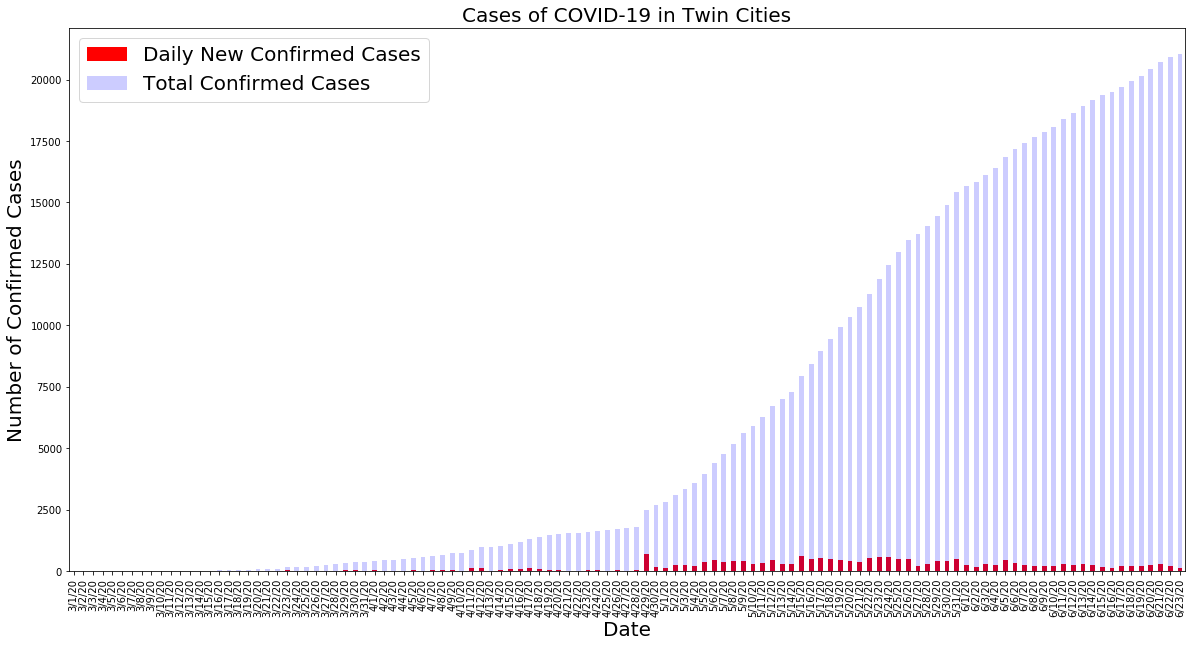

In [13]:
plt.figure(figsize=(20,10))
new_per_day.plot(label='Daily New Confirmed Cases', kind='bar', color='red')
cum_total.plot(label='Total Confirmed Cases', kind='bar', color='blue', alpha=0.20)
#mort_rate.plot(label='Mortality', kind='bar', color='red', alpha=0.70)
plt.xticks(rotation=90)
plt.title('Cases of COVID-19 in Twin Cities', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Confirmed Cases', fontsize=20)
plt.legend(loc="upper left", fontsize=20)
plt.show()

In [14]:
T = pd.read_csv("/Users/kiavang/Desktop/2020ClimateDataMarch.csv", index_col=0)
T

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Temperature,,,,,,,,,,,,,,,,,,,,,
Max,50,36,43,42,44,39,53,61,48,42,...,78,88,91,90,86,77,75,84,76,77
Min,32,30,30,24,30,23,32,44,30,23,...,55,62,67,65,68,63,63,62,61,59
Average,41,33,37,33,37,31,43,53,39,33,...,67,75,79,78,77,70,69,73,69,68


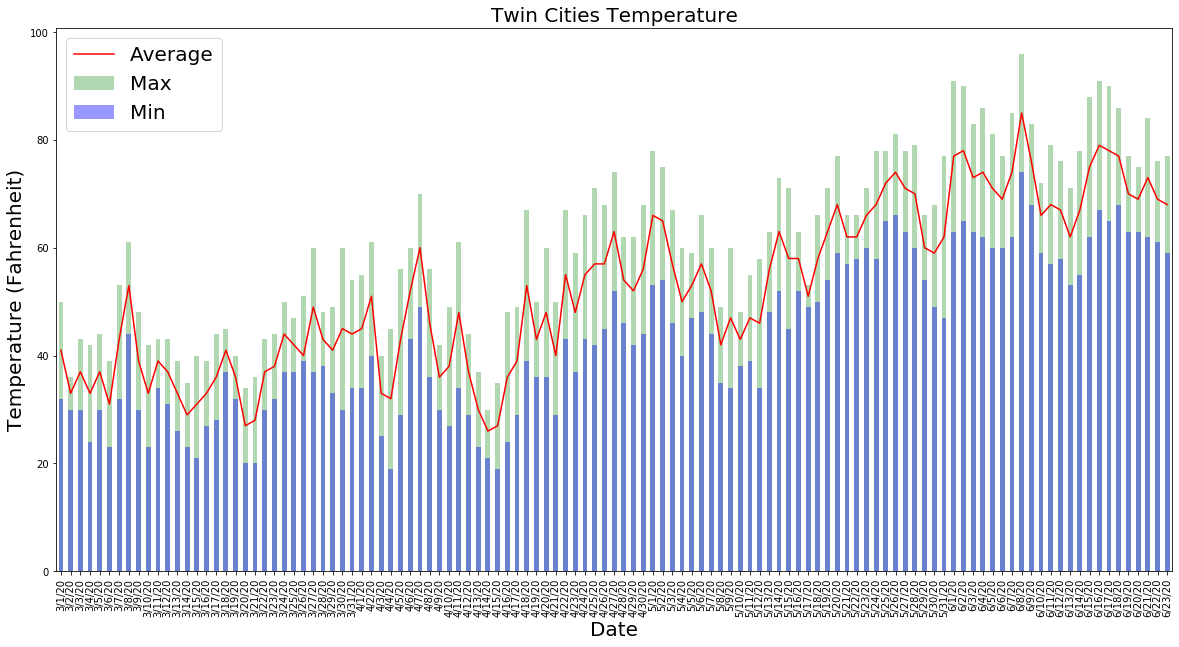

In [15]:
plt.figure(figsize=(20,10))
T.iloc[0].plot(kind='bar', color='green', alpha=0.30)
T.iloc[1].plot(kind='bar', color='blue', alpha=0.40)
T.iloc[2].plot(kind='line', color='red')
plt.xticks(rotation=90)
plt.title('Twin Cities Temperature', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature (Fahrenheit)', fontsize=20)
plt.legend(loc="upper left", fontsize=20)
plt.show()

In [16]:
new_per_day

3/1/20       0
3/2/20       0
3/3/20       0
3/4/20       0
3/5/20       0
          ... 
6/19/20    231
6/20/20    261
6/21/20    278
6/22/20    211
6/23/20    151
Length: 115, dtype: int64

In [17]:
cum_total

3/1/20         0
3/2/20         0
3/3/20         0
3/4/20         0
3/5/20         0
           ...  
6/19/20    20155
6/20/20    20416
6/21/20    20694
6/22/20    20905
6/23/20    21056
Length: 115, dtype: int64

In [18]:
T.iloc[0]

3/1/20     50
3/2/20     36
3/3/20     43
3/4/20     42
3/5/20     44
           ..
6/19/20    77
6/20/20    75
6/21/20    84
6/22/20    76
6/23/20    77
Name: Max, Length: 115, dtype: int64

In [19]:
T.iloc[1]

3/1/20     32
3/2/20     30
3/3/20     30
3/4/20     24
3/5/20     30
           ..
6/19/20    63
6/20/20    63
6/21/20    62
6/22/20    61
6/23/20    59
Name: Min, Length: 115, dtype: int64

In [20]:
T.iloc[2]

3/1/20     41
3/2/20     33
3/3/20     37
3/4/20     33
3/5/20     37
           ..
6/19/20    70
6/20/20    69
6/21/20    73
6/22/20    69
6/23/20    68
Name: Average, Length: 115, dtype: int64

# Spearman Correlation Test

In [21]:
def get_spearman(temp_data, num_cases):
    cor, pval = stats.spearmanr(temp_data, num_cases)
    return cor, pval

In [22]:
spearman_new=[]
spearman_cum=[]
spearman_mort=[]
for i in range(0,3):
    cor_new, pval_new = get_spearman(T.iloc[i], new_per_day)
    spearman_new.append(cor_new)
    
    cor_cum, pval_cum = get_spearman(T.iloc[i], cum_total)
    spearman_cum.append(cor_cum)
    
    cor_cum, pval_cum = get_spearman(T.iloc[i], mort_rate)
    spearman_mort.append(cor_cum)

In [23]:
spearman_new #max, min, avg

[0.6353462910485687, 0.6725160541238613, 0.6655006183207168]

In [24]:
spearman_cum #max, min, avg

[0.8471438378453248, 0.8525319845044677, 0.8646436001445849]

In [25]:
spearman_mort #max, min, avg

[0.8508684462523392, 0.8536021831573177, 0.8674386246741653]

In [26]:
temp_labels = ["Temperature Maximum", "Temperature Minimum", "Temperature Average"]

spearman_data = {'New Cases': spearman_new, 'Total Cases': spearman_cum, 'Mortality': spearman_mort}
s_df = pd.DataFrame(data=spearman_data)
s_df.index = temp_labels
s_df.index.name = "Climate Variables"

In [27]:
s_df

,New Cases,Total Cases,Mortality
Climate Variables,,,
Temperature Maximum,0.635346,0.847144,0.850868
Temperature Minimum,0.672516,0.852532,0.853602
Temperature Average,0.665501,0.864644,0.867439


# Kendall Tau Correlation Test

In [28]:
def get_kendalltau(temp_data, num_cases):
    cor, pval = stats.kendalltau(temp_data, num_cases)
    return cor, pval

In [29]:
kendalltau_new=[]
kendalltau_cum=[]
kendalltau_mort=[]
for i in range(0,3):
    cor_new, pval_new = get_kendalltau(T.iloc[i], new_per_day)
    kendalltau_new.append(cor_new)
    
    cor_cum, pval_cum = get_kendalltau(T.iloc[i], cum_total)
    kendalltau_cum.append(cor_cum)
    
    cor_cum, pval_cum = get_kendalltau(T.iloc[i], mort_rate)
    kendalltau_mort.append(cor_cum)

In [30]:
kendalltau_new

[0.4250928282965903, 0.4407337666054995, 0.4399468941260059]

In [31]:
kendalltau_cum

[0.6484314033598249, 0.6550669460405656, 0.6708417477710032]

In [32]:
kendalltau_mort

[0.658540512500275, 0.6624510856148847, 0.6809424660109343]

In [33]:
temp_labels = ["Temperature Maximum", "Temperature Minimum", "Temperature Average"]

kendalltau_data = {'New Cases': kendalltau_new, 'Total Cases': kendalltau_cum, 'Mortality': kendalltau_mort}
k_df = pd.DataFrame(data=kendalltau_data, label=)
k_df.index = temp_labels
k_df.index.name = "Climate Variables"

In [34]:
k_df

,New Cases,Total Cases,Mortality
Climate Variables,,,
Temperature Maximum,0.425093,0.648431,0.658541
Temperature Minimum,0.440734,0.655067,0.662451
Temperature Average,0.439947,0.670842,0.680942
